In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
## Data analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# value counts for categorial data

print(data.sex.value_counts())
print(data.children.value_counts())
print(data.smoker.value_counts())
print(data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## converting the categorical data into numerical data 


In [8]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## ●	Exploratory data analysis

### we were using the univaiate analysis when we do analysis on single single column one by one

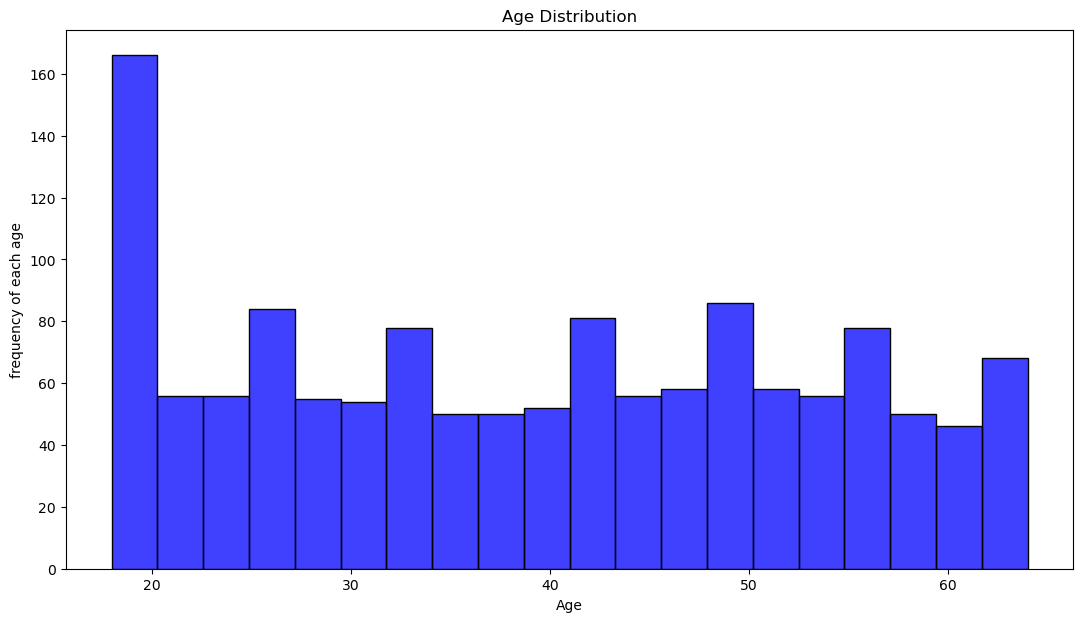

In [11]:
#checking the Age distribution

plt.figure(figsize=(13,7))
sns.histplot(data.age,bins=20,color='blue')

plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('frequency of each age')
plt.show()

***maximum people in a dataset having the age below 20***

## checking the distribution of male and female (gender/sex)


Text(0.5, 1.0, 'gender distribution')

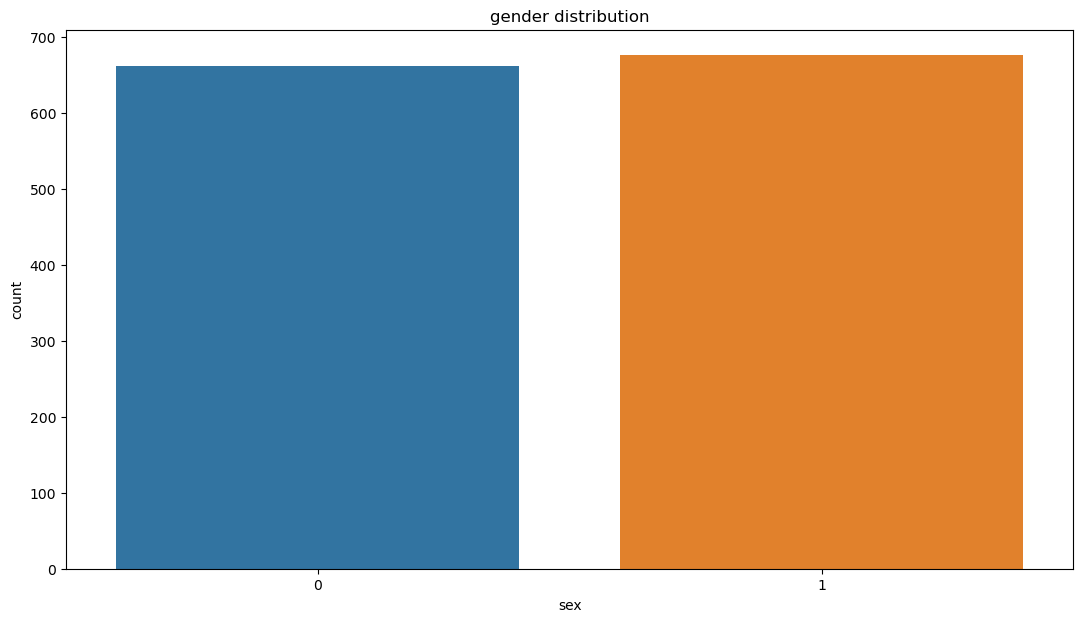

In [12]:
plt.figure(figsize=(13,7))
sns.countplot(x='sex',data = data)
plt.title("gender distribution")

***from above plot we can conclude that the count of male and female is almost similar***

## checking the distribution of Bmi 

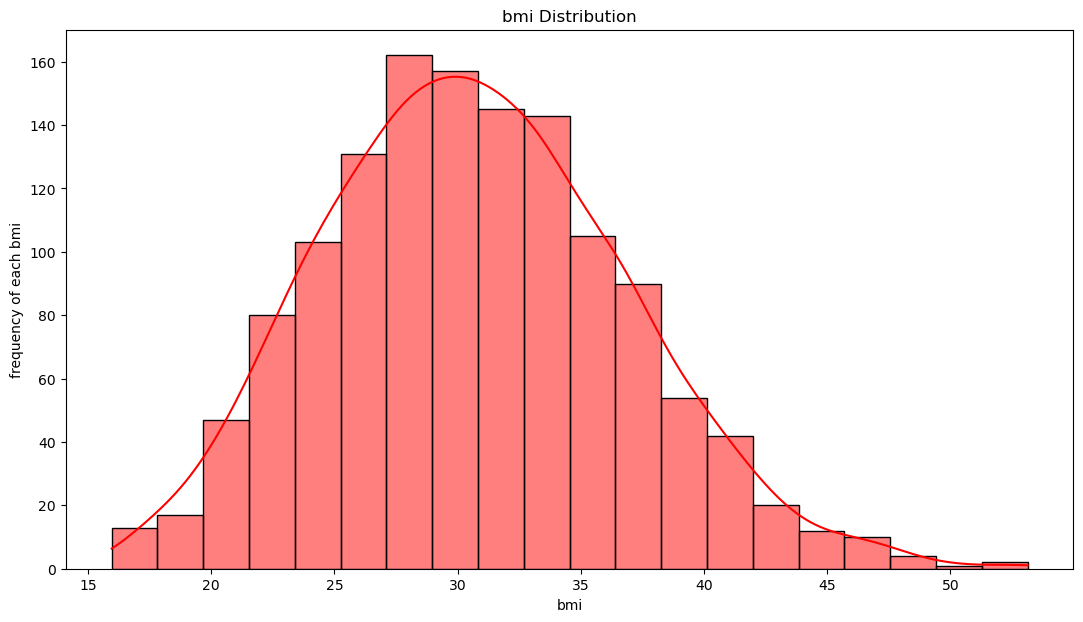

In [13]:
plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins=20,kde=True,color='red')

plt.title("bmi Distribution")
plt.xlabel('bmi')
plt.ylabel('frequency of each bmi')
plt.show()

***the majority of the people have bmi in between 25 to 40 which is consider as overweight and could be a majore factor to increase the medical cost***

In [14]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [15]:
# checking the charges distribution

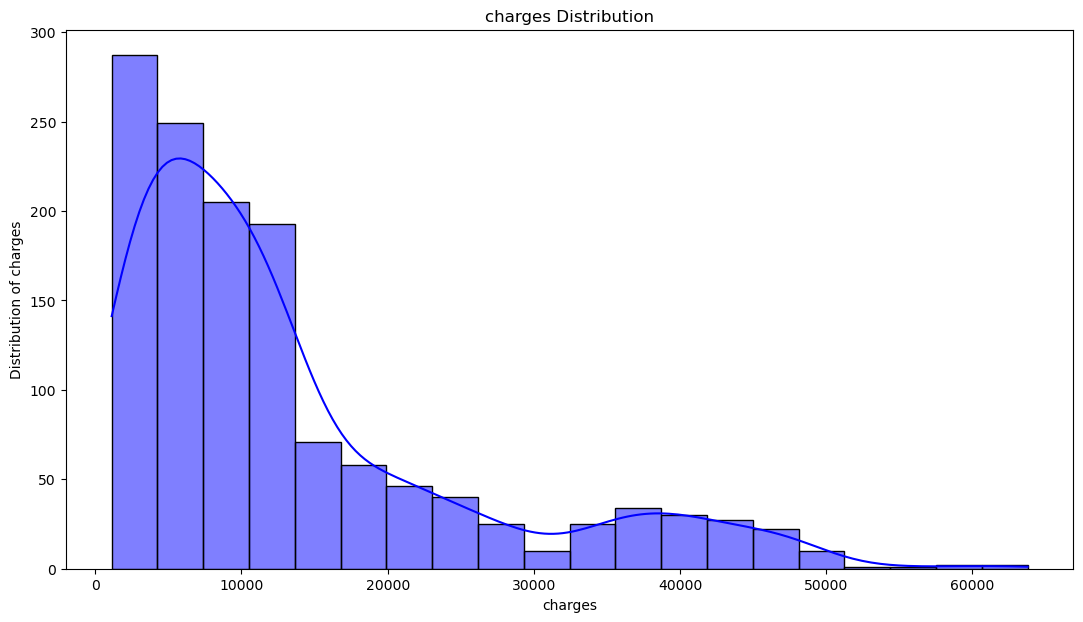

In [16]:
plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins=20,kde=True,color='blue')

plt.title("charges Distribution")
plt.xlabel('charges')
plt.ylabel('Distribution of charges')
plt.show()

the distribution is left bended so this is not uniformly distribution the charges increse for the 500 to 10000 and there is small number of distribution is large in number

Most of the medical expenses are below 20000, with negligible number of patient having a medical expense above 50000


## Bi-variate Analysis

<Figure size 1300x700 with 0 Axes>

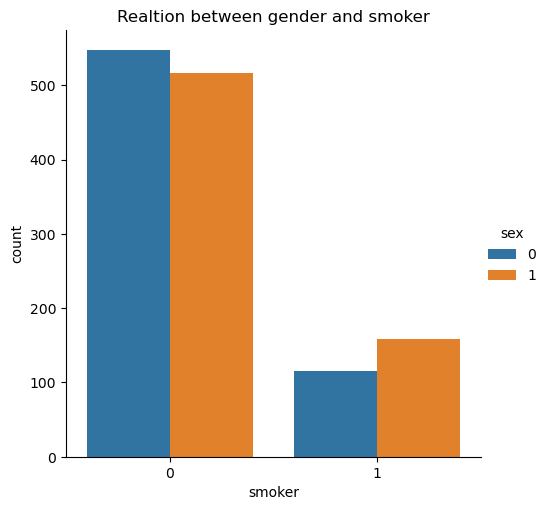

In [17]:
# relation between gender and smoker 

plt.figure(figsize=(13,7))

sns.catplot(x='smoker',kind='count',hue='sex',data=data)
plt.xlabel("smoker")
plt.ylabel("count")
plt.title("Realtion between gender and smoker")
plt.show()

***we can observe that male smoker is more in number, so i can assume that medical treatment expense for male would be more than female***

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

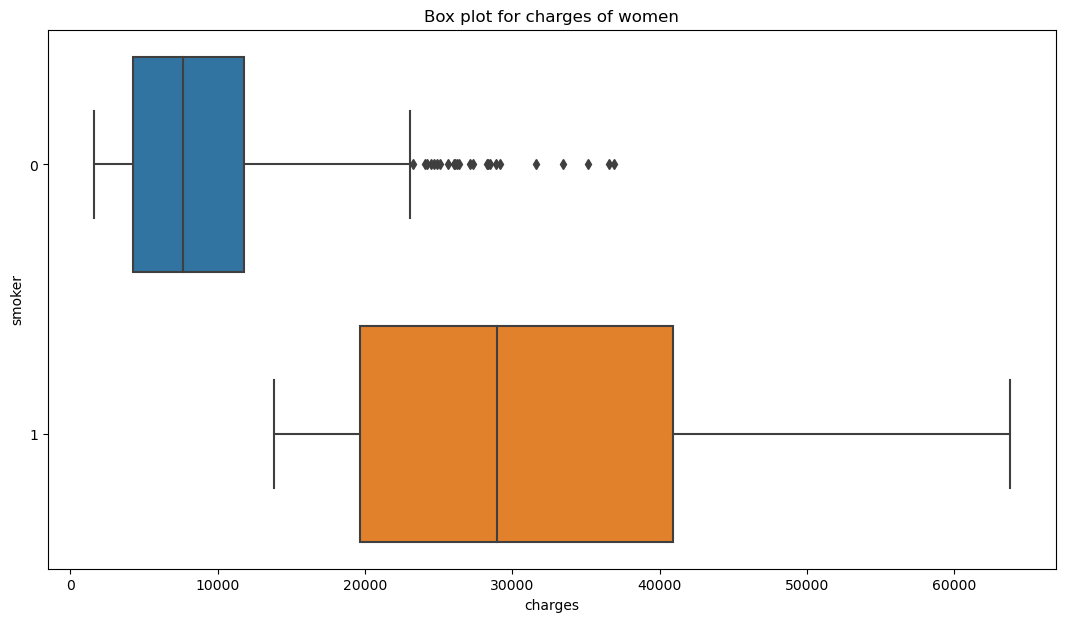

In [18]:
# relation bertween 

plt.figure(figsize=(13,7))

plt.title('Box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

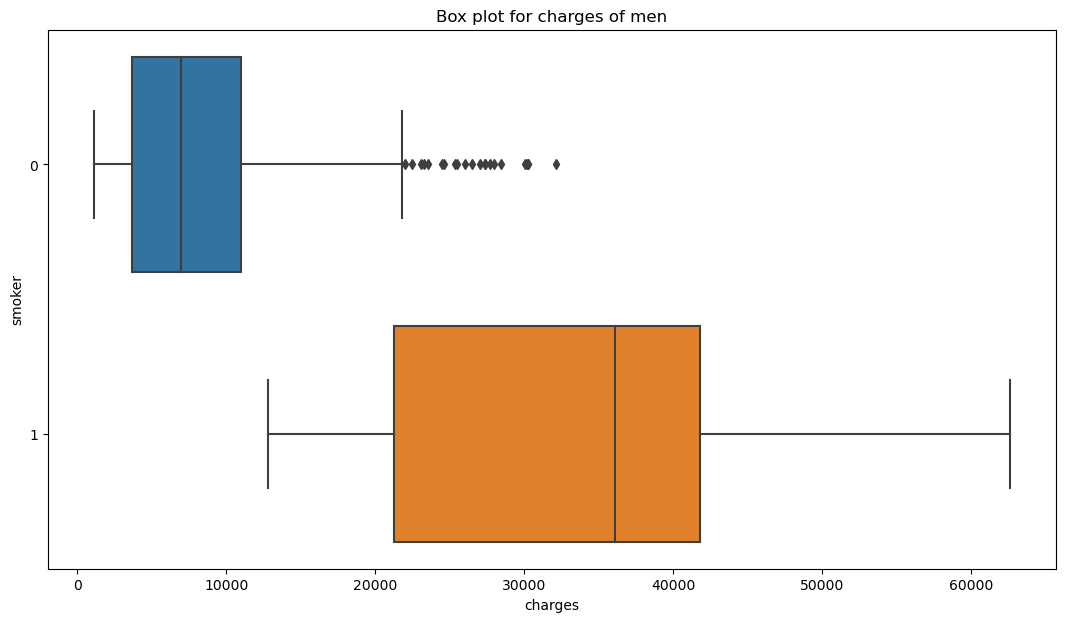

In [19]:
plt.figure(figsize=(13,7))
plt.title('Box plot for charges of men')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h')

***The assumption is true that the medical expenses of male is greater than that of female. in addition to that medical expenses of smokers is greater than that of non-smokers***

In [20]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

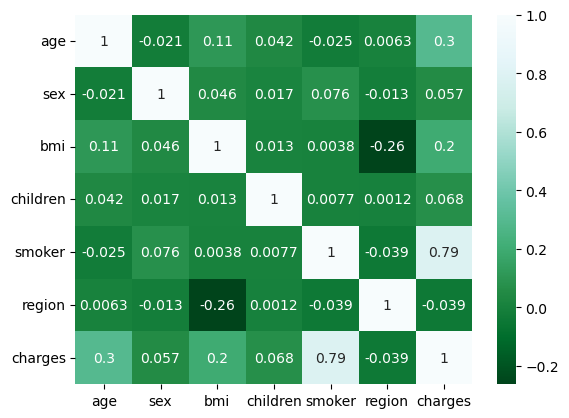

In [21]:
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

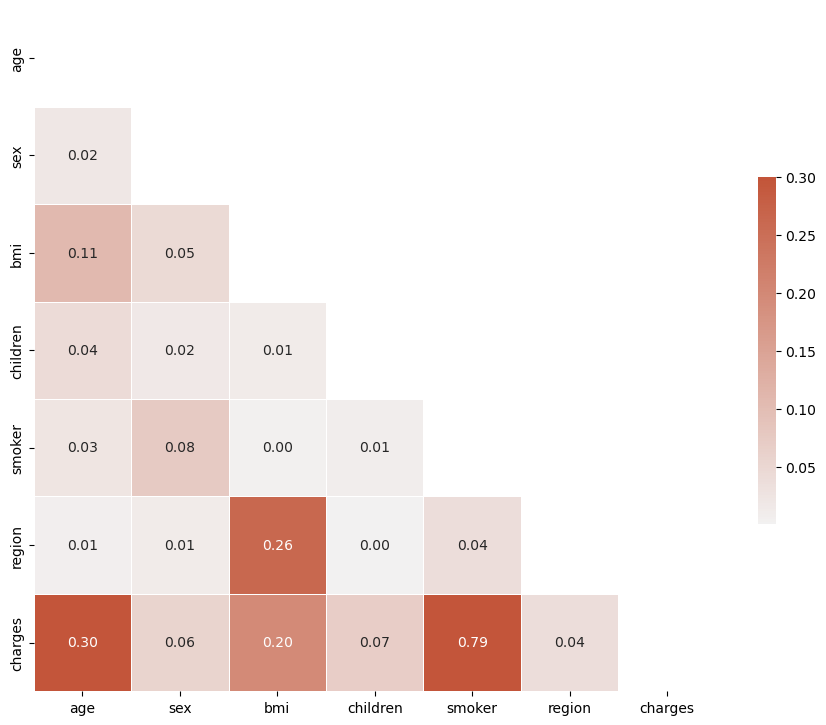

In [22]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20,as_cmap = True)

sns.heatmap(np.abs(corr), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")


plt.show()

*From the heatmap, we can see that the highest correlation is between charges and smoker, with a value of 0.79.
This means that smokers tend to pay more for health insurance than non-smokers.
This makes sense because smoking is a risk factor for many diseases and health problems.*

*The second highest correlation is between charges and age, with a value of 0.3.
This means that older people tend to pay more for health insurance than younger people(it is my hypothesis). 
This also makes sense because older people are more likely to have chronic conditions and require more medical care.*

D:\anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1300x700 with 0 Axes>

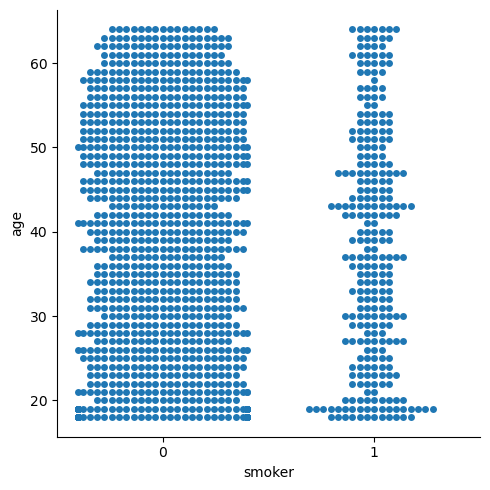

In [23]:
# relation between smoker and age distribution

plt.figure(figsize=(13,7))
sns.catplot(x='smoker',y='age',kind='swarm',data=data)

*from the above graph, we can observe that there is significant number of smoker at the age of 19*

In [24]:
## Multi-Variate Analysis

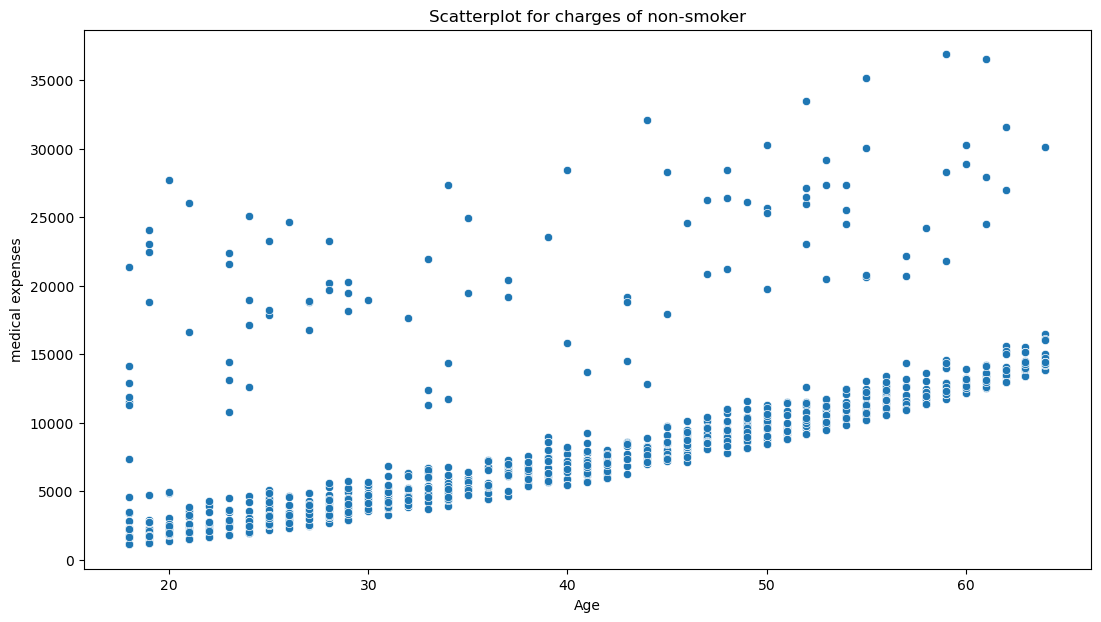

In [25]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data = data[data.smoker==0])
plt.title("Scatterplot for charges of non-smoker")
plt.ylabel("medical expenses")
plt.xlabel("Age")
plt.show()


***majority of the points shows that medical expeness increase with the age which may due to the fact that older people are more prone to illess. But there are some outlier which shows other illness or expeness which may lead to increase in medical expenses***

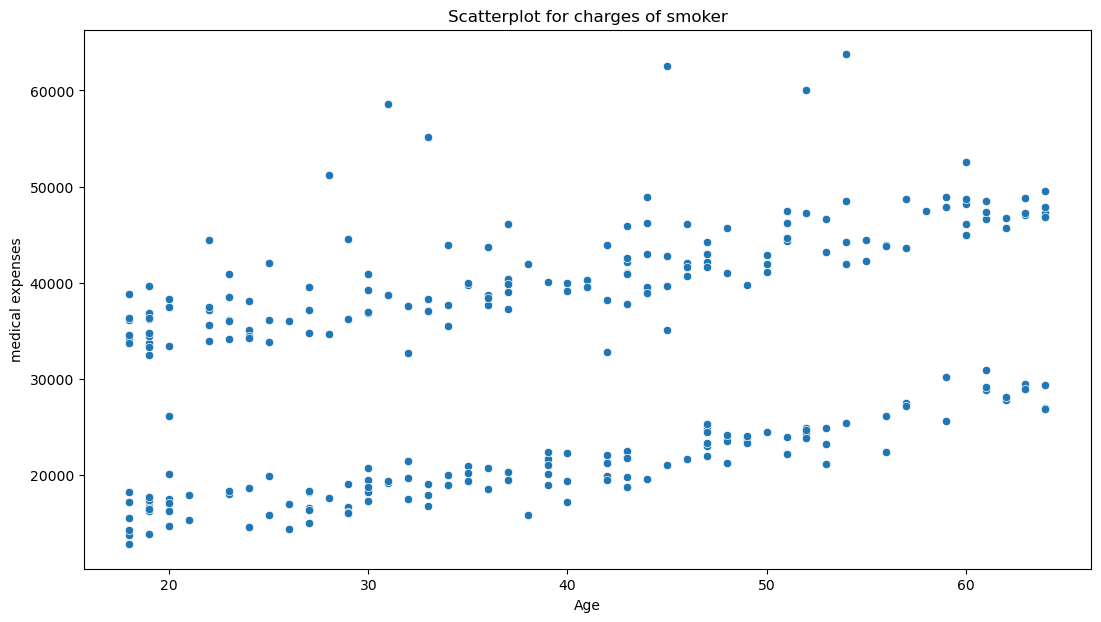

In [26]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='age',y='charges',data = data[data.smoker==1])
plt.title("Scatterplot for charges of smoker")
plt.ylabel("medical expenses")
plt.xlabel("Age")
plt.show()


***In this graph there are two segments, one with high medical expenses which may be due to smoking related illness and other with low medical expenses which may due to age related illness.***

## now, in order to get more clear we can combine both the graph

<Figure size 1300x700 with 0 Axes>

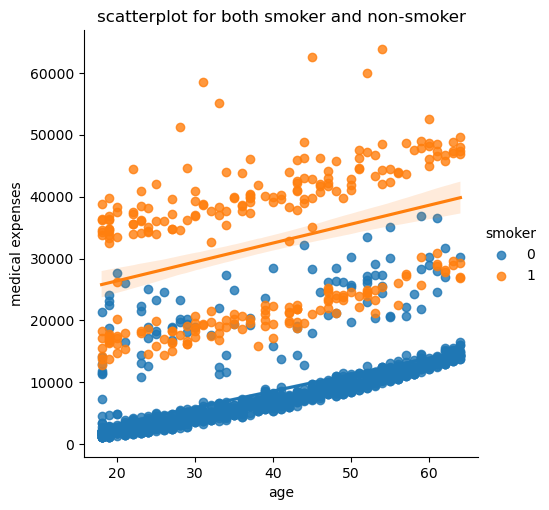

In [27]:
## Age charges Distribution

plt.figure(figsize=(13,7))
sns.lmplot(x='age',y='charges', data = data,hue='smoker')
plt.xlabel('age')
plt.ylabel('medical expenses')
plt.title("scatterplot for both smoker and non-smoker")
plt.show()


**Now, we can clearly understand the variation in charges with respect to age and smoking habit. the medical expenses of smokers is higher than that of non-smoker irrespective of age. In non-smoker, the cost of treatment increases with age which is obvious

C:\Users\deepa\AppData\Local\Temp\ipykernel_13992\3397834263.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi>30)]['charges'])


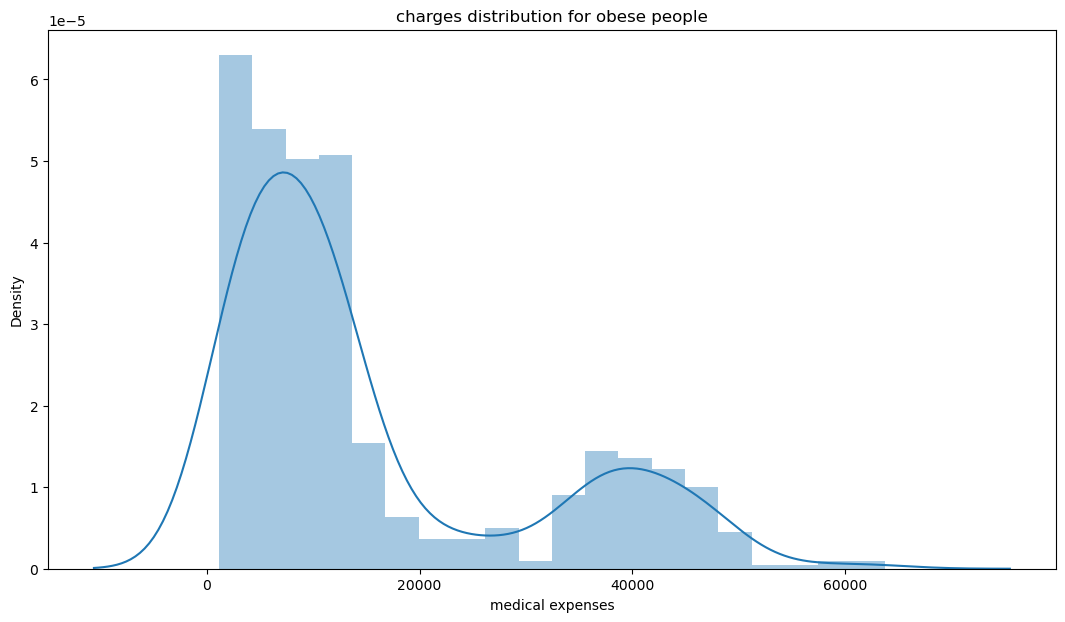

In [28]:
## Relation between the bmi and medical charges 

plt.figure(figsize=(13,7))
sns.distplot(data[(data.bmi>30)]['charges'])
plt.title("charges distribution for obese people")
plt.xlabel('medical expenses')
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_13992\2017913022.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.bmi<30)]['charges'])


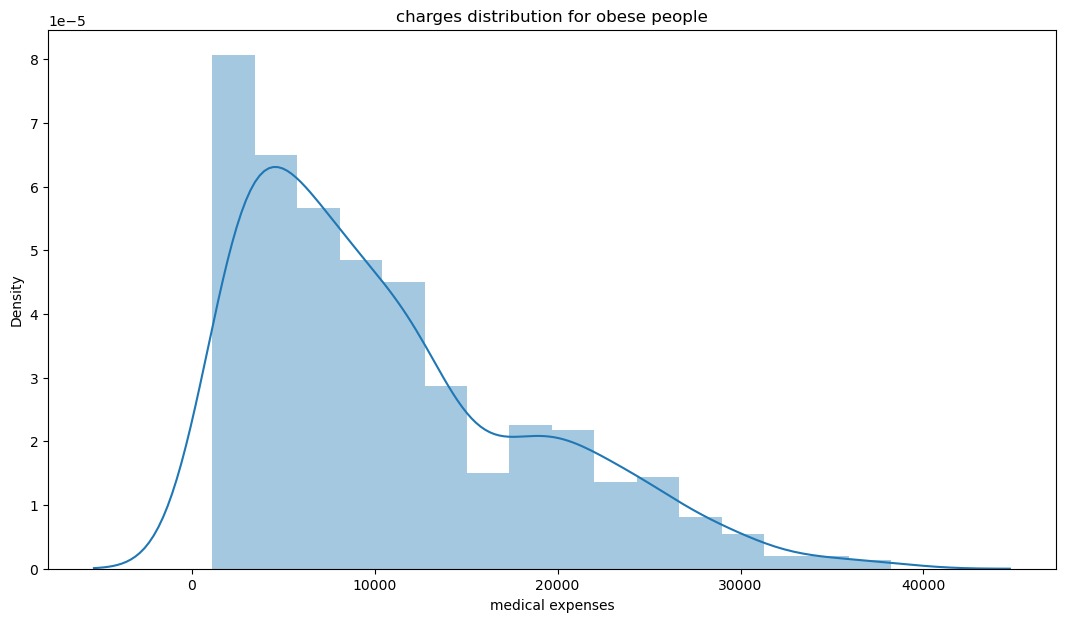

In [29]:
## Relation between the bmi and medical charges 

plt.figure(figsize=(13,7))
sns.distplot(data[(data.bmi<30)]['charges'])
plt.title("charges distribution for obese people")
plt.xlabel('medical expenses')
plt.show()

**Therefore, people with BMI less than 30 are spending less where as people with BHI more than 30 are spending more**|

### Model Building & Evaluation

## Linear regression


In [30]:
x= data.drop('charges',axis=1)
y=data.charges

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1003, 6) (335, 6) (1003,) (335,)


In [33]:
## Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

In [34]:
#making prediction
y_pred = reg.predict(x_test)

In [35]:
#model evalution
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) #mean squared error
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  # mean absolute error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #root mean square error

MAE: 4118.993639799498
RMSE: 6065.115557193267


C:\Users\deepa\AppData\Local\Temp\ipykernel_13992\1159483454.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='charges', ylabel='Density'>

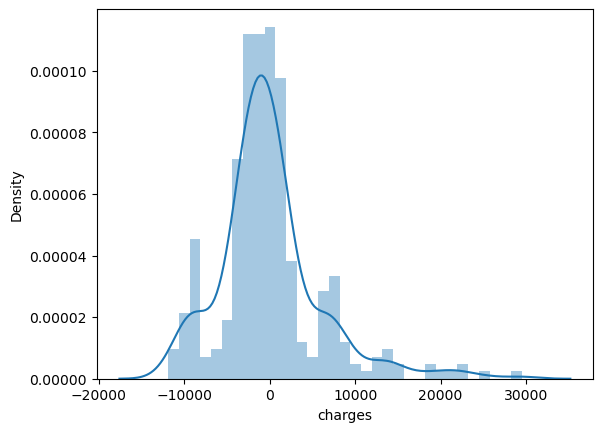

In [36]:
# to detect the skewness is there is an outlier or not 
import seaborn as sns
sns.distplot(y_test-y_pred)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7562657897203888

## feature selection

In [38]:
## Dropping irrelevant column
data.drop('region',axis=1,inplace = True)

In [39]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [40]:
## Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_test,y_test)

LinearRegression()

In [41]:
#making prediction
y_pred = reg.predict(x_test)

In [42]:
#model evalution
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) #mean squared error
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  # mean absolute error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #root mean square error

MAE: 4118.993639799498
RMSE: 6065.115557193267


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7562657897203888

## Polynomial Regression

In [44]:
# creating pipeline and fitting it on data
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [45]:
# transform the feature to higher degree

x_train_poly = poly_reg.fit_transform(x_train)

#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_train_poly,y_train,test_size=0.25,random_state=42)

In [46]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(752, 28) (251, 28) (752,) (251,)


In [47]:
## train the model 
plr = LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [48]:
#making the prediction
y_pred_plr = plr.predict(x_test)

In [49]:
#model evaluation
#model evalution
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr)) #mean squared error
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  # mean absolute error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr))) #root mean square error

MAE: 2941.5880775099604
RMSE: 4673.372884542895


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_plr)

0.8372920904434504

**Result:My Model is able to explain 83% of the total dataset**

## Making a prediction System

In [54]:
#input values
age =21
sex=1
bmi=27
region=0
children =0
smoker =1

In [56]:
#predicting the price using random forest regression

charges = reg.predict([[age,sex,bmi,region,children,smoker]])
print("the charge of this new patient is :- $",charges[0])

the charge of this new patient is :- $ 1522.7053499209578


D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion

**We have created End to End Prediction system using Linear Regression Model and our accuracy score comes out to be a 75%. Later, we can use more advanced libraries to make this system more versatile and robust, so that we can deploy it in the market.**

**Moreover, based on our analysis we can observe that medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.**

***Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits***